In [458]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [459]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [460]:
# Enter path of csv files 
directory = r"/content/drive/MyDrive/NewCSVs_Dataset_I_BandstoPart-III"

In [461]:
array1 = []
for file in os.listdir(directory):
    print(file)
    filepath = os.path.join(directory,file)
    df_temp = pd.read_csv(filepath)
    df_temp['Channel'] = file.split('.')[0]
    array1.append(df_temp)

dftoBands_ADHD_DS_I.csv
dftoBands_NonADHD_DS_I (2).csv


In [462]:
df_full = pd.concat(array1)

In [463]:
df_full.head()


,Unnamed: 0,Alpha,Delta,Beta,Gamma,Label,channel,Channel
0,0,(17.126143070082815+0j),(1434.4209980929134+0j),(4.7290877202834505+0j),(1.3191461850667643+0j),ADHD,A,dftoBands_ADHD_DS_I
1,1,(1.847496228582672e-09+0j),(3.229571758383044e-09+0j),(4.0883053030412516e-10+0j),(2.255547147970758e-11+0j),ADHD,B,dftoBands_ADHD_DS_I
2,2,(2.2741948545984437e-09+0j),(3.0108280390504967e-09+0j),(5.437074064983138e-10+0j),(3.9369085531624925e-11+0j),ADHD,C,dftoBands_ADHD_DS_I
3,3,(2.273839496973852e-09+0j),(1.860341125090901e-09+0j),(8.512306535117899e-10+0j),(5.2561792361011234e-11+0j),ADHD,D,dftoBands_ADHD_DS_I
4,4,(2.176594571797716e-09+0j),(7.1944303860662514e-09+0j),(4.043242467198278e-10+0j),(3.319481100827071e-11+0j),ADHD,E,dftoBands_ADHD_DS_I


In [464]:
df_full.tail()


,Unnamed: 0,Alpha,Delta,Beta,Gamma,Label,channel,Channel
415,415,(1.103940518940607e-08+0j),(2.0404627078432958e-08+0j),(6.2965566607948974e-09+0j),(2.0884034933077726e-10+0j),Non_ADHD,C,dftoBands_NonADHD_DS_I (2)
416,416,(1.108799317415138e-08+0j),(3.930446837026337e-08+0j),(1.183012702423081e-08+0j),(1.261700334607794e-09+0j),Non_ADHD,D,dftoBands_NonADHD_DS_I (2)
417,417,(4.416488845879002e-09+0j),(3.5385983042199653e-09+0j),(3.174963956965538e-09+0j),(1.942529673587103e-10+0j),Non_ADHD,E,dftoBands_NonADHD_DS_I (2)
418,418,(3.6852514923257346e-09+0j),(1.2318290094037678e-07+0j),(1.1149530601489274e-09+0j),(1.5212105223522044e-10+0j),Non_ADHD,F,dftoBands_NonADHD_DS_I (2)
419,419,(1.3040425753357755e-08+0j),(5.991020416572615e-09+0j),(8.106773181459512e-09+0j),(9.359845653835672e-10+0j),Non_ADHD,G,dftoBands_NonADHD_DS_I (2)


In [465]:
duplicate = df_full[df_full.duplicated()]
 
print("Duplicate Rows :")

Duplicate Rows :


In [466]:
df_full.tail()

,Unnamed: 0,Alpha,Delta,Beta,Gamma,Label,channel,Channel
415,415,(1.103940518940607e-08+0j),(2.0404627078432958e-08+0j),(6.2965566607948974e-09+0j),(2.0884034933077726e-10+0j),Non_ADHD,C,dftoBands_NonADHD_DS_I (2)
416,416,(1.108799317415138e-08+0j),(3.930446837026337e-08+0j),(1.183012702423081e-08+0j),(1.261700334607794e-09+0j),Non_ADHD,D,dftoBands_NonADHD_DS_I (2)
417,417,(4.416488845879002e-09+0j),(3.5385983042199653e-09+0j),(3.174963956965538e-09+0j),(1.942529673587103e-10+0j),Non_ADHD,E,dftoBands_NonADHD_DS_I (2)
418,418,(3.6852514923257346e-09+0j),(1.2318290094037678e-07+0j),(1.1149530601489274e-09+0j),(1.5212105223522044e-10+0j),Non_ADHD,F,dftoBands_NonADHD_DS_I (2)
419,419,(1.3040425753357755e-08+0j),(5.991020416572615e-09+0j),(8.106773181459512e-09+0j),(9.359845653835672e-10+0j),Non_ADHD,G,dftoBands_NonADHD_DS_I (2)


In [467]:
for col in 'Alpha Beta Gamma Delta'.split():
    df_full[col] = df_full[col].apply(
        lambda s: complex(s).real
    )

df_full.head()

,Unnamed: 0,Alpha,Delta,Beta,Gamma,Label,channel,Channel
0,0,1.712614e+01,1.434421e+03,4.729088e+00,1.319146e+00,ADHD,A,dftoBands_ADHD_DS_I
1,1,1.847496e-09,3.229572e-09,4.088305e-10,2.255547e-11,ADHD,B,dftoBands_ADHD_DS_I
2,2,2.274195e-09,3.010828e-09,5.437074e-10,3.936909e-11,ADHD,C,dftoBands_ADHD_DS_I
3,3,2.273839e-09,1.860341e-09,8.512307e-10,5.256179e-11,ADHD,D,dftoBands_ADHD_DS_I
4,4,2.176595e-09,7.194430e-09,4.043242e-10,3.319481e-11,ADHD,E,dftoBands_ADHD_DS_I


In [468]:
df_full.dtypes

Unnamed: 0      int64
Alpha         float64
Delta         float64
Beta          float64
Gamma         float64
Label          object
channel        object
Channel        object
dtype: object

In [469]:
# df_full['Label'] = df_full['Label'].replace(['ADHD','Non_ADHD'],[1,0]) 

In [470]:
df_full.head()

,Unnamed: 0,Alpha,Delta,Beta,Gamma,Label,channel,Channel
0,0,1.712614e+01,1.434421e+03,4.729088e+00,1.319146e+00,ADHD,A,dftoBands_ADHD_DS_I
1,1,1.847496e-09,3.229572e-09,4.088305e-10,2.255547e-11,ADHD,B,dftoBands_ADHD_DS_I
2,2,2.274195e-09,3.010828e-09,5.437074e-10,3.936909e-11,ADHD,C,dftoBands_ADHD_DS_I
3,3,2.273839e-09,1.860341e-09,8.512307e-10,5.256179e-11,ADHD,D,dftoBands_ADHD_DS_I
4,4,2.176595e-09,7.194430e-09,4.043242e-10,3.319481e-11,ADHD,E,dftoBands_ADHD_DS_I


In [471]:
df_full= df_full.drop(['Unnamed: 0', 'channel','Channel'], axis =1)

In [472]:
# shuffle the DataFrame rows
df_full = df_full.sample(frac = 1)
df_full.head()

,Alpha,Delta,Beta,Gamma,Label
190,1.847496e-09,3.229572e-09,4.088305e-10,2.255547e-11,ADHD
31,1.108799e-08,3.930447e-08,1.183013e-08,1.261700e-09,Non_ADHD
402,2.273839e-09,1.860341e-09,8.512307e-10,5.256179e-11,ADHD
350,1.712614e+01,1.434421e+03,4.729088e+00,1.319146e+00,Non_ADHD
303,1.103941e-08,2.040463e-08,6.296557e-09,2.088403e-10,Non_ADHD


In [473]:
df_full.tail()

,Alpha,Delta,Beta,Gamma,Label
385,1.712614e+01,1.434421e+03,4.729088e+00,1.319146e+00,ADHD
71,1.903549e-08,8.839209e-08,8.909336e-09,3.259062e-10,Non_ADHD
415,1.103941e-08,2.040463e-08,6.296557e-09,2.088403e-10,Non_ADHD
323,1.847496e-09,3.229572e-09,4.088305e-10,2.255547e-11,ADHD
305,4.416489e-09,3.538598e-09,3.174964e-09,1.942530e-10,Non_ADHD


In [474]:

len(df_full)


840

In [475]:
X = df_full.drop('Label',axis=1)
y = df_full['Label']

In [476]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle = False, random_state = 40)


In [477]:
X_train

,Alpha,Delta,Beta,Gamma
190,1.847496e-09,3.229572e-09,4.088305e-10,2.255547e-11
31,1.108799e-08,3.930447e-08,1.183013e-08,1.261700e-09
402,2.273839e-09,1.860341e-09,8.512307e-10,5.256179e-11
350,1.712614e+01,1.434421e+03,4.729088e+00,1.319146e+00
303,1.103941e-08,2.040463e-08,6.296557e-09,2.088403e-10
...,...,...,...,...
376,3.685251e-09,1.231829e-07,1.114953e-09,1.521211e-10
306,3.370092e-16,4.616997e-16,5.970115e-17,6.125924e-18
408,1.103941e-08,2.040463e-08,6.296557e-09,2.088403e-10
334,3.685251e-09,1.231829e-07,1.114953e-09,1.521211e-10


In [478]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##LightBGM

In [479]:
from lightgbm import LGBMClassifier
classifier = LGBMClassifier(random_state=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
lightgbm_acc = accuracy_score(y_test,y_pred)
print('Accuracy ', np.round(lightgbm_acc,2))
print(classification_report(y_test,y_pred))

Accuracy  0.91
              precision    recall  f1-score   support

        ADHD       1.00      0.81      0.89        98
    Non_ADHD       0.85      1.00      0.92       112

    accuracy                           0.91       210
   macro avg       0.93      0.90      0.91       210
weighted avg       0.92      0.91      0.91       210



## Logistic Regression

In [480]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
lg_acc = accuracy_score(y_test,y_pred)
print('Accuracy ', np.round(lg_acc,2))
print(classification_report(y_test,y_pred))

Accuracy  0.43
              precision    recall  f1-score   support

        ADHD       0.44      0.81      0.57        98
    Non_ADHD       0.37      0.10      0.15       112

    accuracy                           0.43       210
   macro avg       0.40      0.45      0.36       210
weighted avg       0.40      0.43      0.35       210



In [481]:
print(confusion_matrix(y_test,y_pred))

[[ 79  19]
 [101  11]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


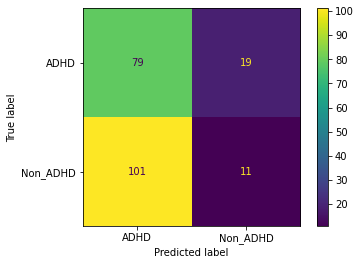

In [482]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()

## KNN

In [483]:
from sklearn.neighbors import KNeighborsClassifier
import math
k=math.sqrt(60)
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
knn_acc = accuracy_score(y_test,y_pred)
print('Accuracy ', np.round(knn_acc,2))
print(classification_report(y_test,y_pred))

Accuracy  0.95
              precision    recall  f1-score   support

        ADHD       0.90      1.00      0.95        98
    Non_ADHD       1.00      0.90      0.95       112

    accuracy                           0.95       210
   macro avg       0.95      0.95      0.95       210
weighted avg       0.95      0.95      0.95       210



[[ 98   0]
 [ 11 101]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


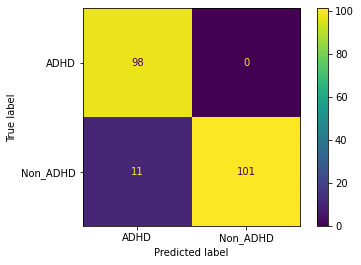

In [484]:
print(confusion_matrix(y_test,y_pred))
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()

# RandomForest



In [485]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
rf_acc = accuracy_score(y_test,y_pred)
print('Accuracy ', np.round(rf_acc,2))
print(classification_report(y_test,y_pred))

Accuracy  0.43
              precision    recall  f1-score   support

        ADHD       0.44      0.81      0.57        98
    Non_ADHD       0.37      0.10      0.15       112

    accuracy                           0.43       210
   macro avg       0.40      0.45      0.36       210
weighted avg       0.40      0.43      0.35       210



[[ 79  19]
 [101  11]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


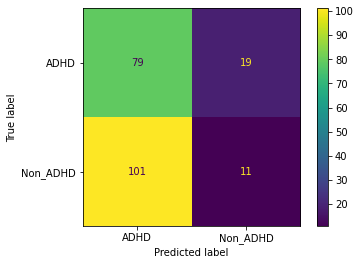

In [486]:
print(confusion_matrix(y_test,y_pred))
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()

# MLP

In [487]:
from sklearn.neural_network import MLPClassifier

In [488]:
clf = MLPClassifier(hidden_layer_sizes=(100,),random_state=42)
clf.fit(X_train, y_train)
y_pred_mlp = clf.predict(X_test)
mlp_acc = accuracy_score(y_test,y_pred_mlp)
print('Accuracy ', np.round(mlp_acc,2))


Accuracy  0.43


In [489]:
print(classification_report(y_test,y_pred_mlp))

              precision    recall  f1-score   support

        ADHD       0.44      0.81      0.57        98
    Non_ADHD       0.37      0.10      0.15       112

    accuracy                           0.43       210
   macro avg       0.40      0.45      0.36       210
weighted avg       0.40      0.43      0.35       210



# performance comparison

In [490]:
results = pd.DataFrame({
    'Model': ['KNN',
              'LightBGM',
              'Logistic Regression',
              'MLPClassifier',
              'Random Forest'
              ],
    'Score': [knn_acc,
                lightgbm_acc,
                lg_acc,
              mlp_acc,
              rf_acc]
                })
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Score
Model,
KNN,0.947619
LightBGM,0.909524
Logistic Regression,0.428571
MLPClassifier,0.428571
Random Forest,0.428571
